# ODEs: Undamped pendulum

We are now going to investigate an undamped pendulum. The equations of motion for a pendulum with length $L$ and mass $m$ are:

$$
\frac{d^2\theta}{dt^2} = -\omega_0^2 \sin(\theta)
$$

where $\omega_0 = \sqrt{g/L}$ (with $g$ being the gravitational constant). 

For small oscillations, the analytic solution is

$$
\theta(t) = A \cos(\omega_0 t + \phi)
$$

where A and $\phi$ are set by initial conditions. For our purposes, we will have

$$\theta(t=0) = \theta_0$$

$$\omega(t=0) = 0 $$

so $A = \theta_0$ and $\phi = 0$, leading to the analytic solution

$$
\theta(t) = \theta_0 \cos(\omega_0 t)
$$


For all cases, it is insufficient to utilize the [Euler](https://en.wikipedia.org/wiki/Euler_method), [Euler-Cromer](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method), or [Midpoint](https://en.wikipedia.org/wiki/Midpoint_method) methods to achieve stable orbits. We will investigate the use of the [Verlet](https://en.wikipedia.org/wiki/Verlet_integration) scheme:

$$
\vec{v}_n = \frac{\vec{r}_{n+1} - \vec{r}_{n-1}}{2\tau} + \mathcal{O}(\tau^2)
$$

$$
\vec{x}_n = 2\vec{x}_n - \vec{x}_{n-1} + \tau^2 \vec{a}_n
$$

In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
from odes import *

## Set constants

In [3]:
omega0 = 1.0

## Set initial conditions and initialize trajectory

In [4]:
method = ODEMethod.EULER
theta_init = 0.1
omega_init = 0.0

tmax = 100
n_steps = 10000
tau = tmax / n_steps

# Calculate analytical result
t = np.arange(0, tmax, tau)
theta_true = theta_init * np.cos(omega0 * t)

## Define a "wrap" function when the pendulum turns over (for plotting)

In [5]:

def wrap_theta(theta):
    while theta > np.pi:
        theta -= 2 * np.pi
    while theta <= -np.pi:
        theta += 2*np.pi
    return theta

## Simulate the trajectory

In [6]:
def get_trajectory(method=ODEMethod.EULER, tmax=100, n_steps=10000):
    tau = tmax / n_steps
    t = np.arange(0, tmax, tau)

    theta = np.zeros(n_steps)
    omega = np.zeros(n_steps)
    alpha = np.zeros(n_steps)

    theta[0] = theta_init
    omega[0] = omega_init

    state = np.zeros(3)
    state[0] = theta_init    # angle
    state[1] = omega_init    # angular velocity
    state[2] = 0.            # angular acceleration
    
    # Get the "last" state vector for Verlet scheme
    # Using a step backward with the Euler scheme
    state_old = np.zeros(3)
    state_old[2] = -omega0**2 * np.sin(theta_init)
    state_old[1] = omega_init
    state_old[0] = theta_init - omega_init*tau + 0.5*tau**2*state_old[2]
    
    for i in np.arange(1, n_steps) :
        
        ti = t[i-1]
        state[2] = -omega0**2 * np.sin(state[0])
        if method == ODEMethod.EULER:
            state = step_euler(tau, state)
        if method == ODEMethod.EULERCROMER:
            state = step_euler_cromer(tau, state)
        if method == ODEMethod.MIDPOINT:
            state = step_midpoint(tau, state)
        elif method == ODEMethod.VERLET:
            state = step_verlet(tau, state_old, state)
    
        theta[i] = wrap_theta(state[0])
        omega[i] = state[1]
        alpha[i] = state[2]
    return theta, omega, alpha
        

## Plot $\theta$ as a function of time

ODEMethod.EULER


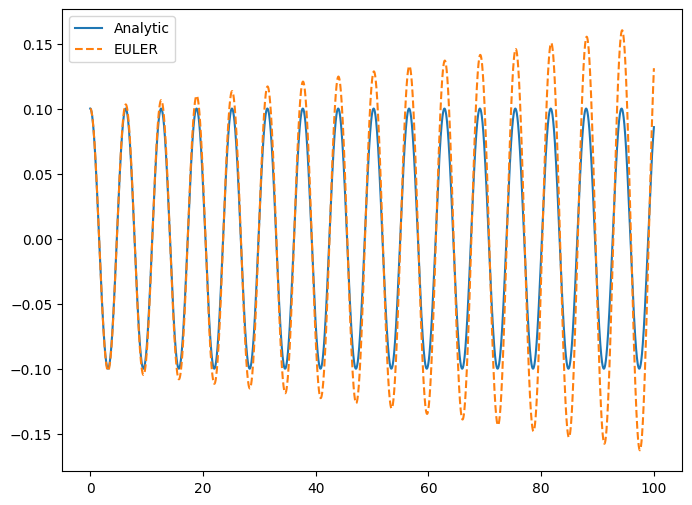

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t,theta_true, label='Analytic', ls="solid")
for method in [ODEMethod.EULER]: # ODEMethod.MIDPOINT, ODEMethod.VERLET
    print(method)
    theta, omega, alpha = get_trajectory(method, tmax=tmax, n_steps=n_steps)
    ax.plot(t,theta, label=method.name, ls="dashed")
ax.legend()

# Hands-on: now try and compare all of the methods!

In [7]:
#